# 0. Introduction to Jupyter and Python

Jupyter is the latest incarnation of the IPython notebook. We are using Jupyter with the "Python kernel" for the capstone demonstrations for a few reasons, including:

1. We can deploy a notebook and all dependencies so that _zero installation_ is required. The only dependency for users is a web browser of their choice.
2. As described in a [Nature article titled "Interactive notebooks: Sharing the code"](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261), author Helen Shen tells the story of the power of interactive code notebooks in reproducible research. These are a valuable teaching and communication tool that all could benefit from learning.
3. As the article describes, it's easy to write nicely formatted notes in the Markdown language. Native $\LaTeX$ support is included.
3. Python is a nice, free language with a plethora of free and open-source tools to use.

Please do note that it is possible to generate Jupyter notebooks in three officially supported languages: Python, R, and Julia. Hence the name (Ju)(Pyt)e(R). You can find and follow instructions on the [Jupyter documentation site](http://jupyter.readthedocs.io/en/latest/index.html) to learn more.

## Using the Jupyter Notebook: some examples

If it is not yet clear, we can write formatted text and run Python code in this notebook and the output gets printed below the code cell. Check it out:

In [23]:
message = 'hello, world! Jupyter, yeah!'
for i in range(10):
    print i
print message

0
1
2
3
4
5
6
7
8
9
hello, world! Jupyter, yeah!


We can import code from the filesystem or from libraries that are included in this particular distribution that the Virtual Watershed CI-Data team has put together for you:

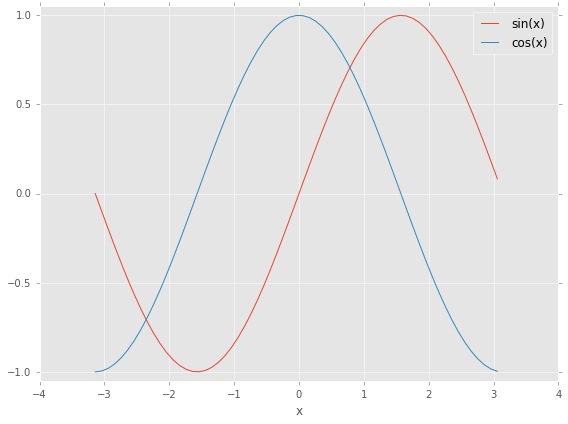

In [24]:
# tell Jupyter to show our plots after the cell in which they were created
%matplotlib inline

# matplotlib has some annoying warnings we will ignore
import warnings
warnings.filterwarnings("ignore", module="matplotlib")

# now import useful plotting and numerical python tools
import matplotlib.pyplot as plt
from mpltools import style
import numpy as np

style.use('ggplot')

# create some vectors to plot
x = np.arange(-np.pi, np.pi, 0.1)  # create a vector from -π to π with spacing of 0.1
y = np.sin(x)
z = np.cos(x)

fig, ax = plt.subplots(1, 1, figsize=(8,6))

plt.plot(x, y, label='sin(x)')
plt.plot(x, z, label='cos(x)')
plt.xlabel('x')
plt.ylim(-1.05, 1.05)
l = plt.legend()

It may seem like we needed a lot of code to just make a simple plot, but really this is a nice looking plot for very little investment.

### Creating your own notebook from existing notebooks

In these exercises you will need to create your own team and/or personal copy of the notebooks. Doing this is pretty easy. From the main page (https://team1-test.virtualwatershed.org for Team 1 for example), click the checkbox to the left of the notebook you'd like to duplicate, then click the "Duplicate" button at the top of the list of files, as shown here:

![Duplicate .ipynb](images/jupyter_duplicate_ipynb.png)

### Editing, running, and changing the type of cells

You'll also need to know how to edit, run, and change the type of different cells. A cell is just the container for the text we type in in the Jupyter notebook. You can edit a cell simply by clicking on it. If you press ESC, you will go from edit mode to command mode. Press Enter to return to "edit" mode. 

In command mode, you can type commands like `Ctrl-M` then `c` to copy a cell. You can then press `Ctrl-M` then `v` to paste that cell after whatever cell you're currently on, as long as you're still in command mode. You can see these keyboard shortcuts and more by clicking the keyboard icon in the toolbar above, to the left of the 'CellToolbar' button.

To toggle between a markdown documentation cell and a code cell, use the dropdown that's part of the same toolbar where you found the Keyboard icon.

After you've either written some code in a code cell or written some documentation in a Markdown cell, press `Shift+Enter` to run or format the cell and move to the cell below. If there is already a cell below, the focus will simply move to that cell. If there is no cell below, a code cell will be created and focus will move to it. You can press `Alt+Enter` to run or format a cell and create and move to a new cell whether or not one exists. Press `Ctrl+Enter` to run or format the cell while keeping focus on the cell and transferring to command mode.

As a final note, as you edit, run, and document, **SAVE YOUR NOTEBOOK** by pressing `(Ctrl/Command)-S` depending on whether your operating system is (Windows/OS X).

For a quick introduction to formatting your text with Markdown, follow this tutorial: [www.markdowntutorial.com](www.markdowntutorial.com)


## Python Programming Basics

Here I show two important Python data types, lists and dictionaries. Lists are extended to be more powerful in the form of numpy arrays, which are mathematical vectors, and then these can be further extended by indexing these arrays with time instead of an integer to create time series. Dictionaries are key-value pairs, which can be constructed like `d = {'a': 1, 'b': 5, 'z': 6}`. Then `d['z']` returns `6`. More on dictionaries after we talk about their simpler cousin, the Python list.


### Lists

You can create a list in Python in a couple of important ways. The first is to just write it explicitly

```python
l = [0, 1, 2]
```

Or you can create the same list by using the built-in, always-available, `range` function

```python
l = range(3)
```

Notice how we don't write `range(2)`. That would give us the list `[0, 1]`. Finally, we can access the length of a list by 

#### Slicing lists

Lists and other array-like objects can be sliced in Python by using colons like so

```python
l = ['a', 'b', 'c', 'd', 'e', 'f']

assert l[0] = 'a'
assert l[:2] == ['a', 'b']  # note like with range we only get the first two elements
assert l[2:5] == ['c', 'd', 'e']  # the first index is inclusive, the last one is exclusive
assert l[-1] == 'f'
```

*Note:* The `assert` statements above raise an exception (i.e. stop the program with an error) if the statement evaluates to `False`. So when we write 

```python
assert l[-1] == 'f' 
```

we are simply saying that `l[-1]` is equal to `['f']`.


#### List Comprehensions

Something useful and unique in Python is the _list comprehension_. Here is an example:

```python
letters = [letter for letter in 'alphabet']
assert letters == ['a', 'l', 'p', 'h', 'a', 'b', 'e', 't']

def sq(x):
    return x*x
    
l = [1, 2, 3, 4]
squares = [sq(i) for i in l]
assert squares == [1, 4, 9, 16]
```

There will be many uses of list comprehensions in the material to follow. They really find their power in examples where we want to filter a list and perform more complicated operations on the elements of a list.

### Dictionaries

As we briefly said in the introduction to this section, a dictionary is a way to build a "lookup table", where the elements are not indexed by a sequential integer, as in a list. Instead, we can make up arbitrary labels for arbitrary data. For example, the following are legal dictionaries in Python:

```python
circus = {'act 1': 'acrobats', 'act 2': 'lion tamer', 'act 3': 'fire eater'}
precip_data = {'rain': [0, 1, 2.2, 3.3, 5.0, 6.7], 'station_name': 'Incline Village SNOTEL'}
d1 = {'snow': [0, 1, 2.3, 5], 0: 'melt'}
```

A dictionary is made up of *keys*, which is the stuff to the left of the colon, and *values*, the stuff to the right of the colon. This is where the term "key-value pairs" comes from. We use the keys to "index" the values. So for example

```python
assert circus['act 1'] == 'acrobats'
assert precip_data['station_name'] == 'Incline Village SNOTEL'
d1[0] == 'melt'
```

As you can see, each key-value pair is separated by a comma, so a dictionary can be made of as many key-value pairs as you like. As with lists, you can write dictionary comprehensions. Here is a simple example where we just modify an existing dictionary by multiplying all its values by 2. 

```python
base_dict = {'a': 2, 'b': 4, 'c': 6}
squared_dict = {k: base_dict[k]**2 for k in base_dict}
```

As you can see, when we write `for something in some_dict`, each `something` is a key of the dictionary `some_dict`. More ways to iterate over lists and dictionaries follows below.


### Iteration over lists and dictionaries

Oftentimes in Python, if we can achieve something through a list or dictionary comprehension instead of a loop, we should do that. However there are plenty of occasions for iterating over lists and dicitonaries. Consider the following example of iteration over a list. What is happening should be clear

```python
a = ['these', 'are', 'some', 'words', 'hello']
sentence = ''
for word in a:
    sentence += word + ' '

assert sentence == 'these are some words hello '
```

Now there is a space at the end of the "sentence" that we don't want. Really we'd want a period at the end of a sentence, right? Let's use the `enumerate` function in tandem with some flow control to put a period instead of a space after the last letter in the sentence.

```python
a = ['these', 'are', 'some', 'words', 'hello']
sentence = ''
num_words = len(a)
final_idx = num_words - 1  # 0-based indexing in Python
ending = ' '
for idx, word in enumerate(a):
    if idx == final_idx:
        ending = '.'
    sentence += word + ending

assert sentence == 'these are some words hello.'
```

#### Exercise: Capitalize the first letter of the sentence as well. Google 'capitalize first letter of string in python' to find the answer

In [21]:
a = ['these', 'are', 'some', 'words', 'hello']
sentence = ''
num_words = len(a)
final_idx = num_words - 1  # 0-based indexing in Python
ending = ' '
for idx, word in enumerate(a):
    if idx == final_idx:
        ending = '.'
    sentence += word + ending

print sentence